## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [21]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Lundberg'  # string
student['Firstname']='Tomas' # string
student['CID']='lutomas'        # string
student['DOB-year']=1995         # four-digit integer
student['DOB-month']=12           # integer in the range [1, 12]
student['DOB-day']=17             # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [22]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 1
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 29-Aug-2020 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions
- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following action:
  - Make sure to always complete **Task 0** in the *"Basic problems" notebook. This corresponds to providing your personal details and is needed for examination.
  - Upload your solution in the form of your edited version of this jupyter notebook via Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

In [23]:
# import modules
import numpy as np
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import emcee as emcee
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set('talk')


## Problem 5 (extra)
### (3 points)

#### Reload the third dataset from Problem 3

In [24]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

#### Validation curves
Create a validation curve for the polynomial model (for different degrees) where you plot the training score and the validation score as a function of the model complexity. 
- The model complexity is simply the degree of the polynomial.
- For the computation of training and validation scores you are encouraged to use cross-validation which is more stable than the use of a single, random pair of training and validation sets.

Question to ponder:
- From this curve: Which order polynomial do you think was used when generating the data?

*Hint:* `scikit-learn` has a function `validation_curve` that might be useful. However, it is certainly instructive to implement the calculation of learning curves yourself.

In [25]:
# copy functions from basic problems:
def design_matrix(X, degree=2):
    """
    Returns a design matrix.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        X_d: Design matrix of shape (m, order+1).
    """
    # number of instances
    m = len(X)
    
    # X_d = design matrix. construct it by its definition
    X_d = np.c_[np.ones((m,1))]
    for p in range(1,degree+1):
        X_d = np.c_[X_d, X**p]
    
    return X_d

def solve_normal_equation(X_d, y):
    """
    Solve the normal equation.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features.
        y: Dependent data of shape (m,1).
                  
    Returns:
        theta_best: Best parameters, array of shape (n,).
    """
    H = np.linalg.inv(X_d.T.dot(X_d))
    theta_best = H.dot(X_d.T).dot(y)
    
    return theta_best.flatten()

def linear_regression(X, y, degree=2):
    """
    Performs linear regression for a polynomial model.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        theta_fit: Best fit parameters. Array of shape (degree+1,)
    """
    return solve_normal_equation(design_matrix(X, degree=degree), y)

def mean_squared_error(X, y, theta):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        theta: Parameter array [shape (degree+1,)]. 
            The ordering corresponds to the constant term first.
            
    Return:
        MSE: Mean-squared error defined as
            MSE = (1/m) * sum_i (y[i] - y_model[i])**2,
            where y_model[i] = \sum_m theta[m]*X[i]**m 
    """
    m = len(X)
    degree = len(theta)-1
    X_d_pred = np.ones((m,1))
    for p in range(1,degree+1):
        X_d_pred = np.c_[X_d_pred, X**p]
    y_pred = X_d_pred.dot(theta).reshape(m, 1)
    MSE = 1/m*sum((y-y_pred)**2)[0]
    return MSE

def polynomial_regression(data, degree):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        data = (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
            
    Return:
        MSE_train: Mean-squared error of training data
        MSE_val: Mean-squared error of validation data
        theta_fit: Best fit parameters [array of shape (degree+1,)]
    """
    theta = linear_regression(data[0], data[2], degree=degree)
    MSE_train = mean_squared_error(data[0], data[2], theta)
    MSE_val = mean_squared_error(data[1], data[3], theta)
    return MSE_train, MSE_val, theta

def plot_fit(X, y, ax, theta):
    """
    Plots the regression fit on axis ax given data X and y and best fit parameters theta.
    
    """
    degree = len(theta)-1
    minX=min(X)
    maxX=max(X)
    X_new = np.linspace(minX, maxX, m)
    X_d_pred = np.ones((m,1))
    for p in range(1,degree+1):
        X_d_pred = np.c_[X_d_pred, X_new**p]
    y_pred = X_d_pred.dot(theta)
    
    ax.plot(X_new, y_pred,label=f"order {degree}")
    ax.set_xlabel('X')
    ax.set_ylabel('y')



In [26]:
# functions used for k-fold cross validation
def train_test_split(X, y, index, k_fold):
    """
    Splits data X and y into training and validation sets. The split is made depending on the value of the k_fold
    cross validation.
    
    """
    m=len(X)
    if m%k_fold!=0:
        raise Exception(f'Enter a k that evenly divides size of data\nm={m}\nk={k}')
    val_size=int(m/k_fold) # the size of the validation sets
    total_range = range(1,m)
    val_subset = range(val_size*index,val_size*(index+1)) # the validation subset of size val_size is taken starting at index*val_size
    train_subset = list(set(val_subset).symmetric_difference(total_range)) # the remaining data is used for training
    X_val = X[val_subset]
    y_val = y[val_subset]
    X_train = X[train_subset]
    y_train = y[train_subset]
    
    return (X_train, X_val, y_train, y_val)

def k_fold_cross_validation(X, y, k_fold=4, order=[1,2,3,4,5]):
    """
    Perform polynomial regression with k-fold cross validation on data X and y for the given orders. Returns the k MSE
    scores on the training and validation data as well as the best fit paramters theta for all the given orders.
    """
    MSE_train = np.zeros((k_fold,len(order)))
    MSE_val = np.zeros((k_fold,len(order)))
    theta = {}
    for k in range(k_fold):
        # (1) split data into train and validation set
        data = train_test_split(X, y, index=k, k_fold=k_fold) 
        
        # (2) fit model on training data for each order
        # (3) evaluate on validation data
        for j, o in enumerate(order):
            MSE_train[k][j], MSE_val[k][j], theta[f'cross-validation{k}, order {o}'] = polynomial_regression(data, degree=o)    
        
    return MSE_train, MSE_val, theta

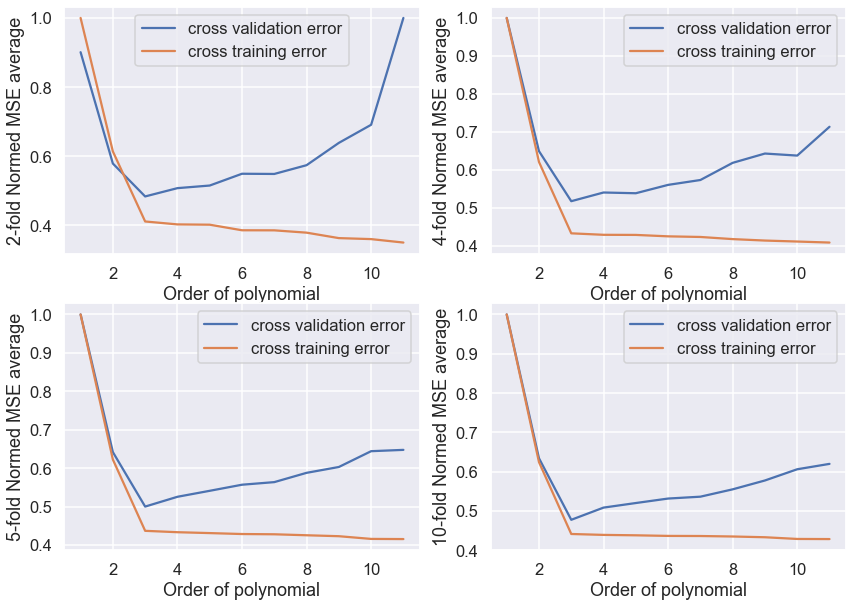

In [27]:
order = range(1,12) # the order of the polynomial fit
K=[2,4,5,10] # different k-fold cross validations used for comparison
fig, axs = plt.subplots(2,2, figsize=(14,10))
for i, k_fold in enumerate(K):
    ax=axs[int(i/2)][i%2]
    # perform the k_fold cross validation on the data for all orders.
    MSE_train, MSE_val, theta = k_fold_cross_validation(X, y, k_fold=k_fold, order=order) 
    
    # compute the cross validation and traing errors as defined by the lecture notes
    cross_validation_error = sum(MSE_val)
    cross_training_error = sum(MSE_train)
    
    # plot the normed errors for all orders
    ax.plot(order, cross_validation_error/max(cross_validation_error), label='cross validation error')
    ax.plot(order, cross_training_error/max(cross_training_error), label='cross training error')
    ax.set_ylabel(f'{k_fold}-fold Normed MSE average')
    ax.legend(loc='best')
    ax.set_xlabel('Order of polynomial');

From this curve: Which order polynomial do you think was used when generating the data?

The MSE values are minimzed at three for all different splits. Therefore, simlirarily as our conclusion in problem 3, we belive that the most probable order of the polynomial that generated the data in data set 3 is of order three. 

## Problem 6 (extra)
### (3 points)

### Gradient descent methods

#### Generate noisy data with a quadratic feature
This is the same data as in Problem 2.

In [8]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

#### (a) Batch and stochastic gradient descent
Implement both batch and stochastic gradient descent and use these methods to find the best fit parameters of a quadratic model.
- You might want to tune the learning hyperparameter $\eta$.
- Do 50 epochs for the SGD (each epoch corresponding to using all instances of data once)
- Compare with the solution from Problem 2.

In [9]:
def bgd(X, y, eta, n_iterations, degree, theta_bgd, progress=1):
    """
    Batch gradient descent on data X and y for n_iteration with given learing rate eta. It is made for polynomial of 
    specified degree with initialized theta_bgd. progress records convergence. 
    """
    m = len(X)
    X_d = design_matrix(X, degree=degree) # create design matrix
    theta_progress = [theta_bgd] # initialize theta_prgress for recording convergence
    for iteration in range(n_iterations):
        gradients = 2/m * X_d.T.dot(X_d.dot(theta_bgd) - y) # compute the gradients
        theta_bgd = theta_bgd - eta * gradients # subtract gradients times the learning rate from theta
        
        #record progress
        if iteration%progress==0:
            theta_progress.append(theta_bgd)
            
    return theta_bgd, theta_progress

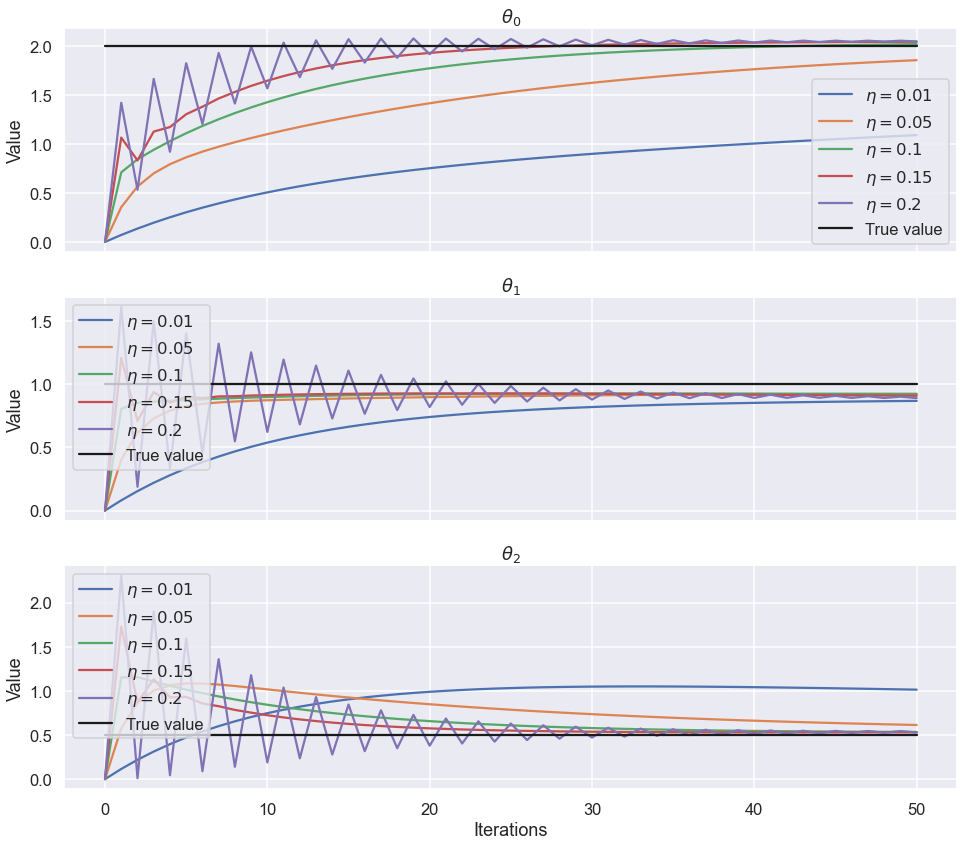

Best fit parameters using batch gradient descent
	theta0=2.0472
	theta1=0.9070
	theta2=0.5309
Best fit parameters using linear regression (problem 2) 
	theta0=2.1123
	theta1=0.7278
	theta2=0.6162


In [10]:
# Implement BGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_bgd = np.array([0., 0., 0.]) # Note the order
theta_true = np.array([2.0, 1.0, 0.5])

# 
# YOUR CODE HERE
# 


degree=2 # degree of polynomial
Eta = [0.01, 0.05, 0.1, 0.15, 0.2] #different learning rates
n_iterations = 50 # number of iterations
iterations = range(n_iterations+1) # used for plotting progress of convergence
theta_bgd = theta_bgd.reshape(3,1)
theta_bgd_best = []
theta_progress = []
# perform batch gradient descent for different learningr rates
for eta in Eta:
    theta_bgd_best_temp, theta_progress_temp = bgd(X, y, eta=eta, n_iterations=n_iterations, 
                                                   degree=degree, theta_bgd=theta_bgd, progress=1)
    theta_bgd_best.append(theta_bgd_best_temp)
    theta_progress.append(theta_progress_temp)

#plot progress for the different parameters for different learning rates
fig, axs = plt.subplots(degree+1, 1, figsize=(16,14), sharex=True)

for theta, eta in zip(theta_progress, Eta):
    for i in range(degree+1):
        ax = axs[i]
        x = [k[i][0] for k in theta]
        ax.plot(iterations, x, label = fr'$\eta={eta}$')
for i in range(degree+1):
    ax=axs[i]
    ax.plot(iterations, [theta_true[i] for j in iterations], 'k', label='True value')
    ax.legend(loc='best')
    ax.set_title(fr'$\theta_{i}$')
    ax.set_ylabel('Value')
ax.set_xlabel('Iterations')
plt.show()
# eta=0.15 gives fastest and'best' convergence
index = Eta.index(0.15)
theta_bgd = theta_bgd_best[index].reshape(3,)
theta_progress_bgd = theta_progress[index]
theta_0 = theta_bgd_best[index][0][0]; theta_1 = theta_bgd_best[index][1][0]; theta_2 = theta_bgd_best[index][2][0] 

print(f'Best fit parameters using batch gradient descent\n\ttheta0={theta_0:.4f}\n\ttheta1={theta_1:.4f}\n\ttheta2={theta_2:.4f}')

theta_problem2 = solve_normal_equation(design_matrix(X), y) # Best theta from linear regression
print(f'Best fit parameters using linear regression (problem 2) \n\ttheta0={theta_problem2[0]:.4f}\n\ttheta1={theta_problem2[1]:.4f}\n\ttheta2={theta_problem2[2]:.4f}')

In [11]:
def sgd(X, y, eta, n_epochs, degree, theta_sgd, progress=1):
    """
    Stochastic gradient descent on data X and y for n_epochs with given learing rate eta. It is made for polynomial of 
    specified degree with initialized theta_bgd. progress records convergence. 
    """
    m = len(X)
    X_d = design_matrix(X, degree=degree) # create design matrix
    theta_progress = [theta_sgd] # intitialize theta_progress for recording convergence
    for epoch in range(n_epochs):
        for i in range(m): 
            random_index = np.random.randint(m) # pick a random instance
            
            # take the data point at that random instance
            xi = X_d[random_index:random_index+1] 
            yi = y[random_index:random_index+1]
            
            gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi) #compute gradients
            theta_sgd = theta_sgd - eta * gradients 
            
        #record progress
        if epoch%progress==0:
            theta_progress.append(theta_sgd)
            
    return theta_sgd, theta_progress

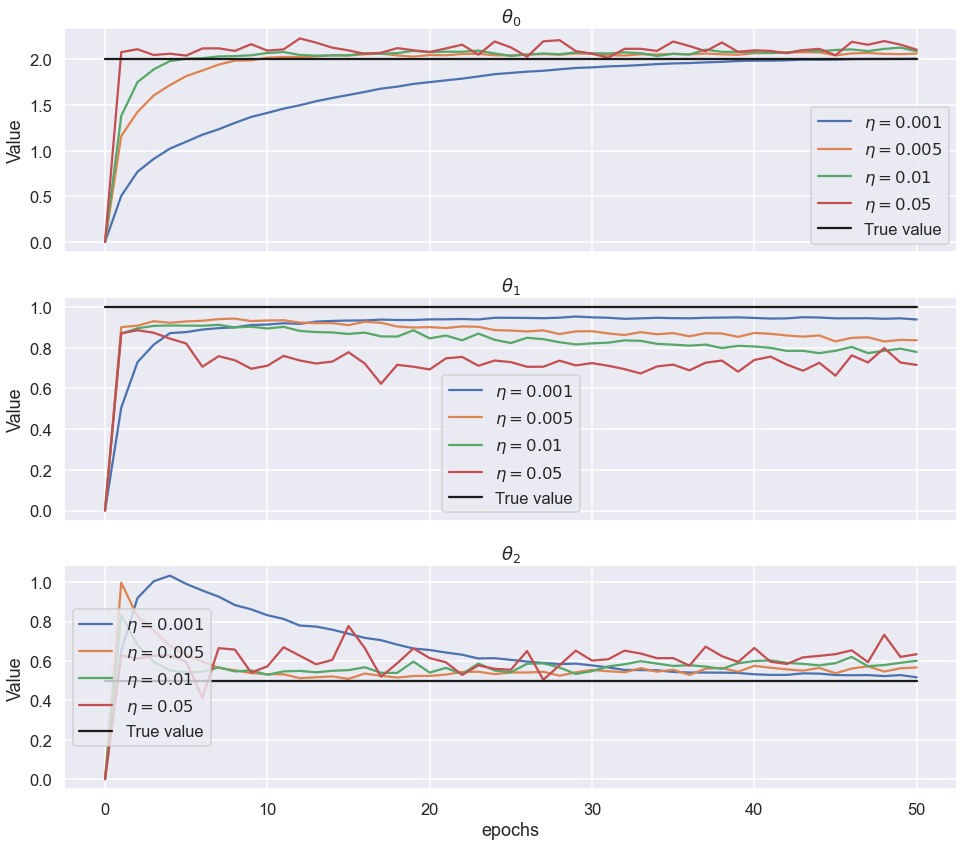

Best fit parameters from stochastic gradient descent
	theta0=2.0889
	theta1=0.7792
	theta2=0.6007
Best fit parameters using linear regression (problem 2) 
	theta0=2.1123
	theta1=0.7278
	theta2=0.6162


In [12]:
# Implement SGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_sgd = np.array([0., 0., 0.]) # Note the order


# 
# YOUR CODE HERE
# 
n_epochs = 50 # number of epochs
degree=2 # degree of polynomial
Eta = [0.001, 0.005, 0.01, 0.05] # different learningr rates
epochs = range(n_epochs+1) #used to plot convergence

theta_sgd = theta_sgd.reshape(3,1)
theta_sgd_best = []
theta_progress = []

# perform SGD on data for different learning rates
for eta in Eta:
    theta_sgd_best_temp, theta_progress_temp = sgd(X, y, eta=eta, n_epochs=n_epochs, 
                                                   degree=degree, theta_sgd=theta_sgd, progress=1)
    theta_sgd_best.append(theta_sgd_best_temp)
    theta_progress.append(theta_progress_temp)

# plot process of convergence for the different parameters for different learning rates
fig, axs = plt.subplots(degree+1, 1, figsize=(16,14), sharex=True)

for theta, eta in zip(theta_progress, Eta):
    for i in range(degree+1):
        ax = axs[i]
        x = [k[i][0] for k in theta]
        ax.plot(epochs, x, label = fr'$\eta={eta}$')
        
for i in range(degree+1):
    ax=axs[i]
    ax.plot(epochs, [theta_true[i] for j in epochs], 'k', label='True value')
    ax.legend(loc='best')
    ax.set_title(fr'$\theta_{i}$')
    ax.set_ylabel('Value')
ax.set_xlabel('epochs')
plt.show()

# eta=0.01 gives fastest and'best' convergence
index = Eta.index(0.01)
theta_progress_sgd = theta_progress[index]
theta_sgd = theta_sgd_best[index].reshape(3,)
theta_0 = theta_sgd_best[index][0][0]; theta_1 = theta_sgd_best[index][1][0]; theta_2 = theta_sgd_best[index][2][0] 

print(f'Best fit parameters from stochastic gradient descent\n\ttheta0={theta_0:.4f}\n\ttheta1={theta_1:.4f}\n\ttheta2={theta_2:.4f}')

theta_problem2 = solve_normal_equation(design_matrix(X), y) # Best theta from linear regression
print(f'Best fit parameters using linear regression (problem 2) \n\ttheta0={theta_problem2[0]:.4f}\n\ttheta1={theta_problem2[1]:.4f}\n\ttheta2={theta_problem2[2]:.4f}')

In [13]:
assert theta_bgd.shape ==(3,)
assert not (theta_bgd==0).any()
assert theta_sgd.shape ==(3,)
assert not (theta_sgd==0).any()


#### (b) Mini-batch gradient descent
Implement mini-batch gradient descent and use this method to find the best fit parameters. Details:
- use a mini-batch size of 20%
- apply a similar learning schedule as in the SGD example (you might have to tune the learning hyperprameters)
- perform 50 epochs 
- hint: the `numpy.random.permutation` function might be useful for creating the mini-batches. 
- Compare with the solutions from BGD and SGD.

In [14]:
t0, t1 = 5, 30  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

In [15]:
def mbgd(X, y, eta, n_epochs, mb_size, degree, theta_mbgd, progress=1):
    """
    Mini batch gradient descent on data X and y for n_epochs with given learing rate eta and minibatch size mb_size given 
    as a fraction. It is made for polynomial of specified degree with initialized theta_bgd. progress records convergence. 
    """
    m = len(X)
    X_d = design_matrix(X, degree=degree) # create design matrix
    theta_progress = [theta_mbgd] # initialize theta_progress used for recording the convergence
    mini_batch_size = int(m*mb_size) # the minibatch size as number of data points
    for epoch in range(n_epochs):
        epoch_index = np.random.permutation(range(m)) # randomly permute range 1 to 100
        for i in range(int(m/mini_batch_size)): 
            # construct mini batch
            mini_batch = epoch_index[i*mini_batch_size:i*mini_batch_size+mini_batch_size] 
            # compute gradients using the mini batches
            eta = learning_schedule(epoch * int(m/mini_batch_size)  + i)
            gradients = 2/mini_batch_size * X_d[mini_batch].T.dot(X_d[mini_batch].dot(theta_mbgd) - y[mini_batch])
            
            theta_mbgd = theta_mbgd - eta * gradients
        if epoch%progress==0:
            theta_progress.append(theta_mbgd)
            
    return theta_mbgd, theta_progress

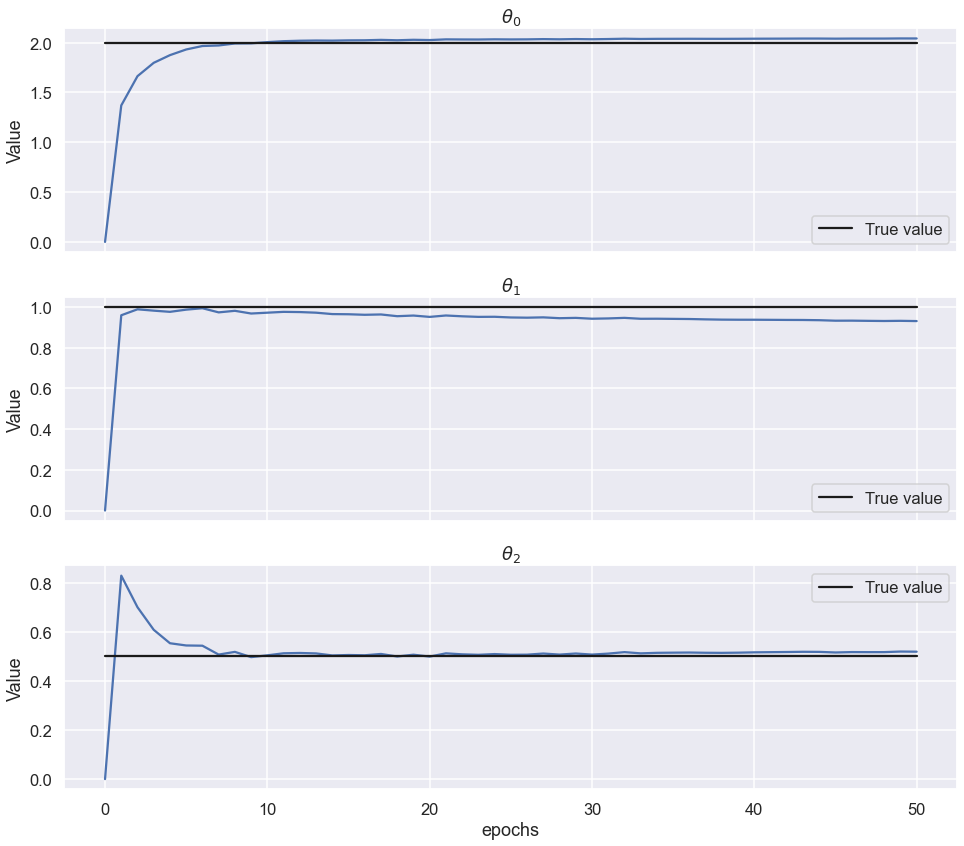

Best fit parameters
	theta0=2.0419
	theta1=0.9310
	theta2=0.5194
Best fit parameters using linear regression (problem 2) 
	theta0=2.1123
	theta1=0.7278
	theta2=0.6162


In [16]:
# Implement MBGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_mbgd = np.array([0., 0., 0.]) # Note the order

# 
# YOUR CODE HERE
# 

mb_size = 0.2 #fraction of data used as the mini match 
n_epochs = 50 # number of epochs
degree=2 # order of polynomial
epochs = range(n_epochs+1) # used for plotting convergence

theta_mbgd = theta_mbgd.reshape(3,1)

theta_best, theta_progress = mbgd(X, y, eta=eta, n_epochs=n_epochs, mb_size=mb_size,
                                               degree=degree, theta_mbgd=theta_mbgd, progress=1)

# plot progress of convergence
fig, axs = plt.subplots(degree+1, 1, figsize=(16,14), sharex=True)

for i in range(degree+1):
    ax = axs[i]
    x = [k[i][0] for k in theta_progress]
    ax.plot(epochs, x)
        
for i in range(degree+1):
    ax=axs[i]
    ax.plot(epochs, [theta_true[i] for j in epochs], 'k', label='True value')
    ax.legend(loc='best')
    ax.set_title(fr'$\theta_{i}$')
    ax.set_ylabel('Value')
ax.set_xlabel('epochs')
plt.show()

theta_mbgd = theta_best.reshape(3,)
theta_progress_mbgd = theta_progress

print(f'Best fit parameters\n\ttheta0={theta_mbgd[0]:.4f}\n\ttheta1={theta_mbgd[1]:.4f}\n\ttheta2={theta_mbgd[2]:.4f}')
theta_problem2 = solve_normal_equation(design_matrix(X), y) # Best theta from linear regression
print(f'Best fit parameters using linear regression (problem 2) \n\ttheta0={theta_problem2[0]:.4f}\n\ttheta1={theta_problem2[1]:.4f}\n\ttheta2={theta_problem2[2]:.4f}')

In [17]:
assert theta_mbgd.shape ==(3,)
assert not (theta_mbgd==0).any()


#### (c) Convergence
Compare the convergence pattern for the BGD, SGD and MGD, i.e. plot the path towards the optimal set of parameters. 
- Note that the path is in 3D (since there are three parameters in our quadratic model). You can plot 2D projections of the path.

In [18]:
def project(x,y,z):
    """
    project the 3D number (x,y,z) to a 2D number (x',y')
    """
    F=z-theta_true[2]
    x_prim = ((x-theta_true[0])*F/z)
    y_prim = ((y-theta_true[1])*F/z)
    return x_prim, y_prim

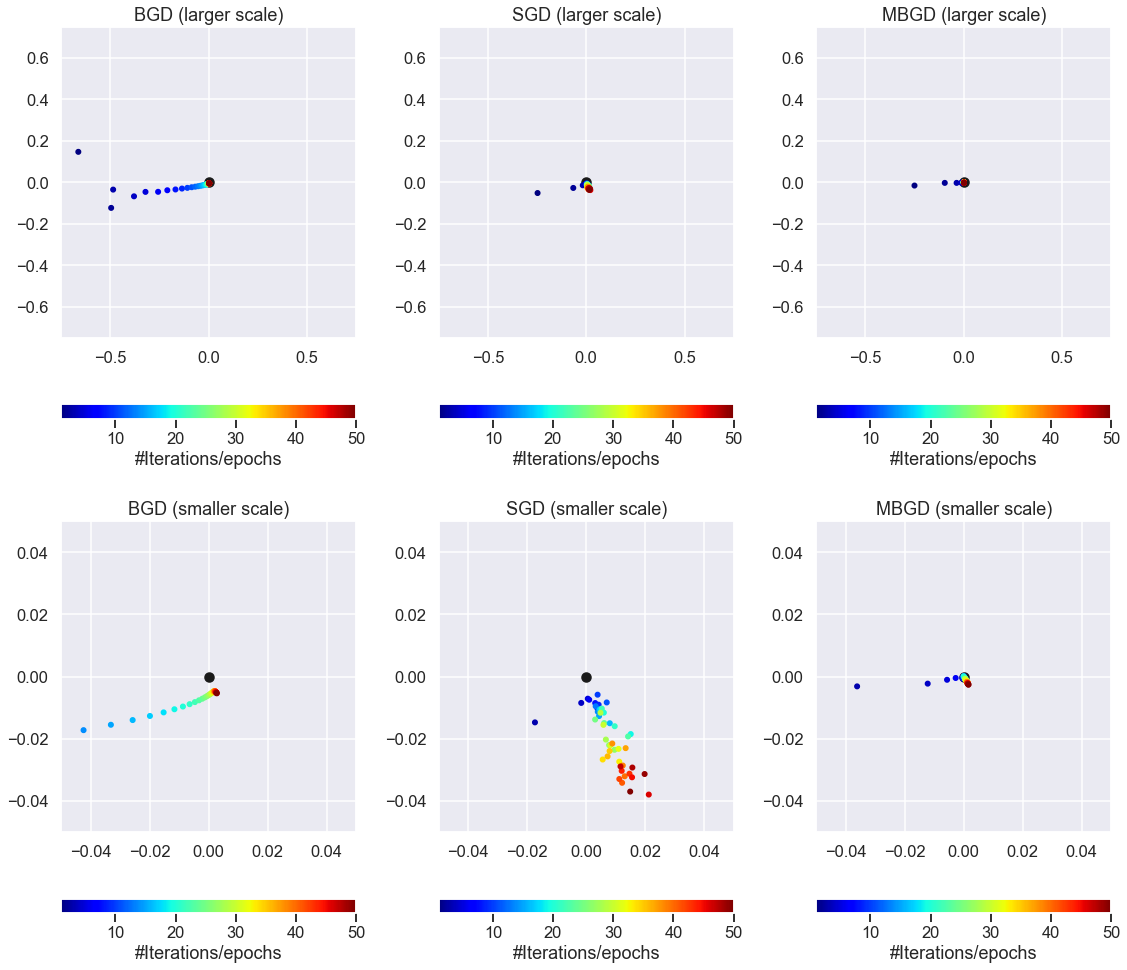

In [19]:
# 
# YOUR CODE HERE
# 

# the progress of convergence for theta for all different gradient descent methods, bgd, sgd, mbgd.
gd_theta = [theta_progress_bgd, theta_progress_sgd, theta_progress_mbgd] 
iterations_epochs = 50 # we used 50 iterations/epochs for the gradient descent methods
gradient = np.linspace(0, 1, iterations_epochs) # gradient used for plotting colour map
fix, axs = plt.subplots(2,3,figsize=(16,14))
Lim = [0.75, 0.05] # axis limits used for showing different scales
gd_methods = ['BGD', 'SGD', 'MBGD'] # the different gradient descent methods used
for i, theta, method in zip(range(3), gd_theta, gd_methods):
    # for each iteration/epoch take x as our value for theta_0, y as our value for theta_1 and z as our value for theta_2.
    x = [k[0][0] for k in theta[1:]]
    y = [k[1][0] for k in theta[1:]]
    z = [k[2][0] for k in theta[1:]]
    x_prim, y_prim = project(x,y,z) #project these values to a 2D-plane
    
    axs[0][i].set_title(method + ' (larger scale)') # the larges scale is shown above
    axs[1][i].set_title(method + ' (smaller scale)') # and the smaller scale below
    for ax, lim in zip([axs[0][i], axs[1][i]], Lim):
        # set the scale
        ax.set_xlim([-lim,lim]) 
        ax.set_ylim([-lim,lim])
        
        # It seems as setting the clim caused the cmap to dissapear so below is a brute solution such that the color map
        # and the range on the colorbar is correct. 
        im = ax.scatter(x_prim,y_prim, c=gradient,  marker='.', s=0, cmap=plt.cm.jet)
        cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
        cbar.set_label('#Iterations/epochs')
        im.set_clim(1, iterations_epochs)
        ax.scatter(0,0, c='k', marker='o')
        ax.scatter(x_prim,y_prim, c=gradient,  marker='.', cmap=plt.cm.jet)
               
plt.tight_layout()